# Aula 2

In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 3

Para utilizar as métricas externas necessita de labels, já as internas não.

Critérios de validação - internas
Compactação - quão próximo são os dados
Separação - quão separado estão os clusters

Coeficiente de silhouette

$s = \frac{\beta - \alpha}{max(\alpha,\beta)}$

s precisa estar entre [-1,1]

$\alpha$ - distância média entre os pontos do cluster

Distância

$d(A,B) = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2}$

$\alpha = \frac{d(A,B) + d(A,C)}{2}$

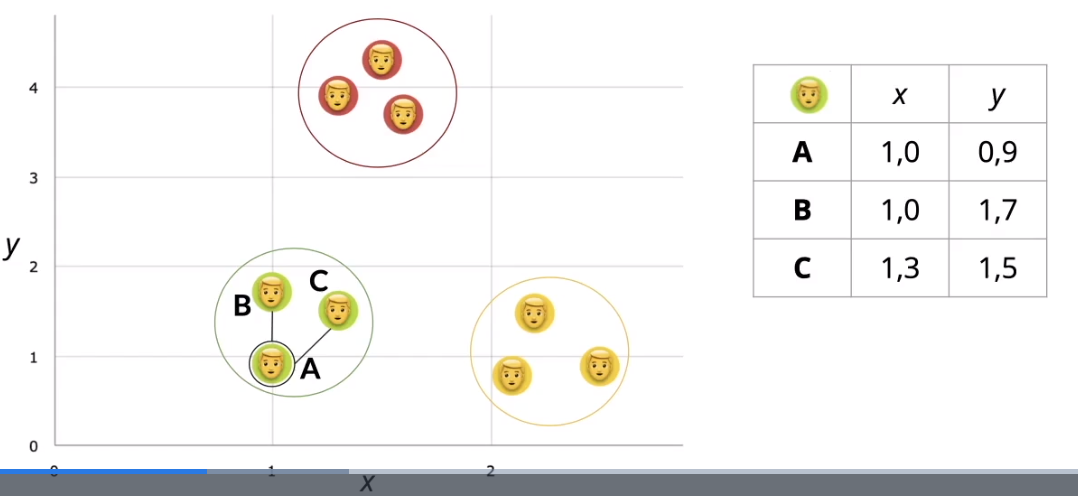

$\beta$ - distância média entre os clusters

$\beta = min(\frac{\sum d(A,V)}{n_V},\frac{\sum d(A,A)}{n_A})$

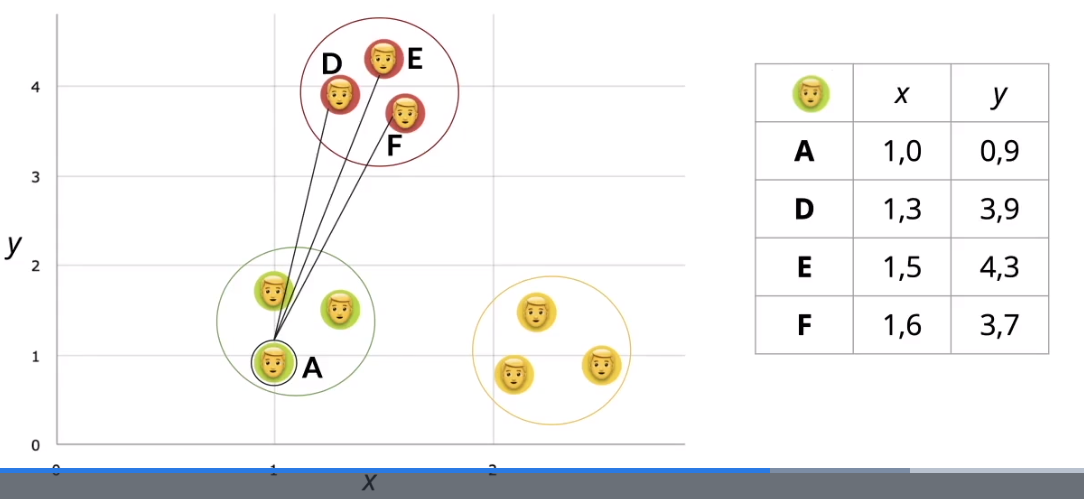

In [14]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645923200014174


# Aula 4

Índice Davies-Bouldin

$DB = \frac{1}{k} \sum_{i=1}^{k} max_{i \neq j} \; R_{ij}$

Medida de similaridade entre clusters => $R_{ij} = \frac{s_i + s_j}{d_{ij}}$

$s_{i}$ - singularidade entre os pontos do cluster - distância média entre os pontos e o centróide

$d_{ij}$ - distância entre os centróides dos clusters

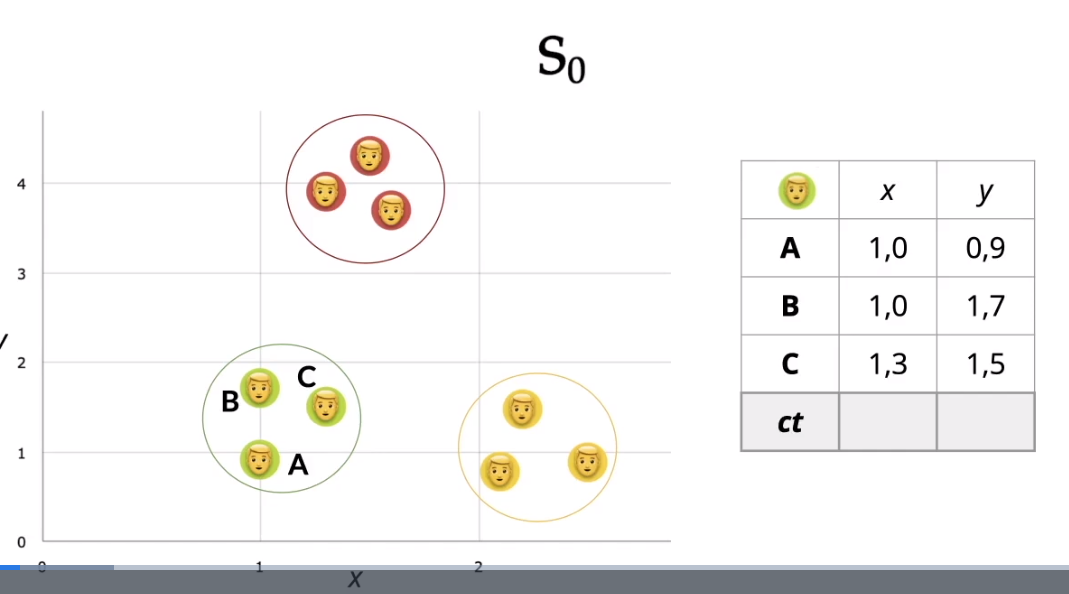

In [15]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0748718449698575


# Aula 5

## Índice Calinski-Harabasz

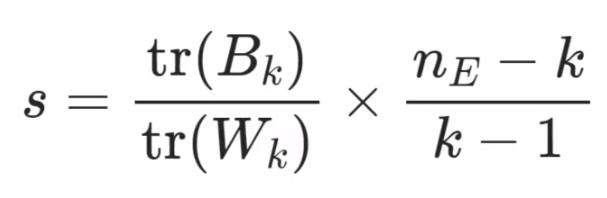

$n_E$ - número de elementos em cada cluster

$k$ - número de clusters

$B_k$ - dispersão dos elementos entre clusters

$W_k$ - dispersãod os elementos dentro do cluster

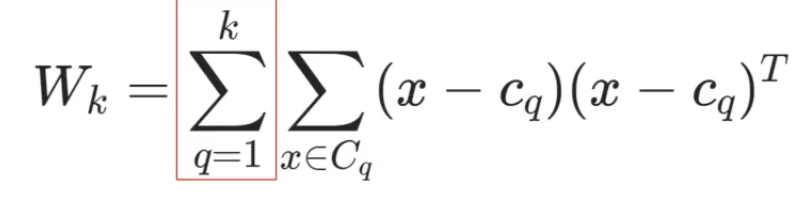

$q$ - cluster

Segundo termo serve para estimar uma matriz de variância-covariância

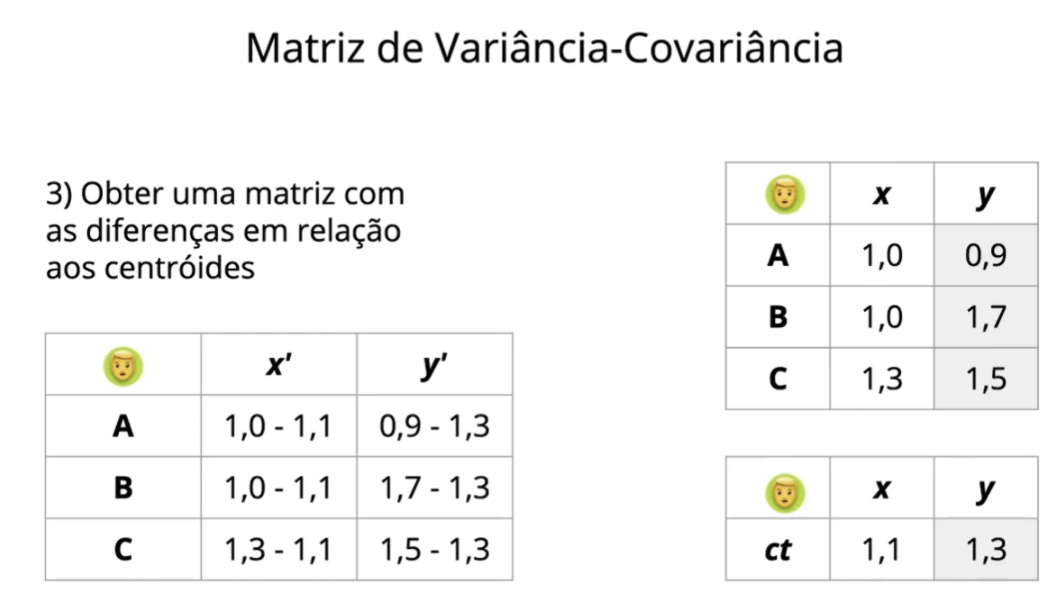
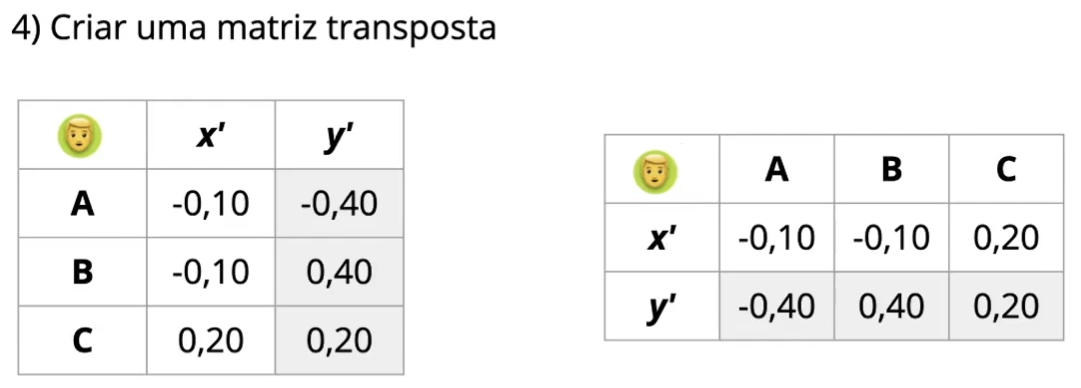
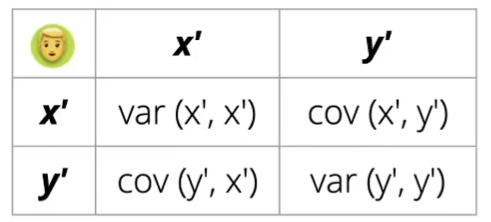

In [31]:
import numpy as np

M = np.array([[1, 0.9],[1,1.7],[1.3,1.5]])
C = np.array([1.1,1.3])
K = M-C
Kt = K.transpose()

print(Kt@K)

Wk = (Kt@K).trace()
print(Wk)

[[0.06 0.04]
 [0.04 0.36]]
0.41999999999999993


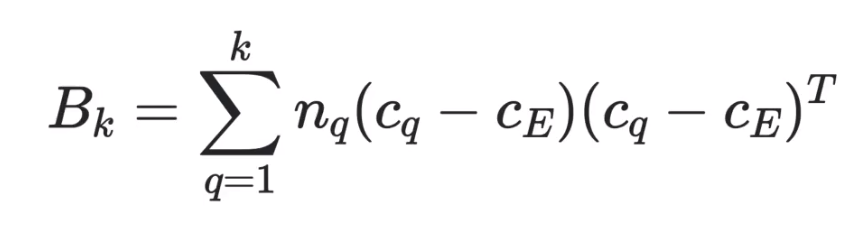

$n_q$ = número de elementos no cluster

$c_q$ - centroide do cluster

$c_E$ - centroide dos elementos

In [46]:
C = np.array([[1.1,1.3]])
Ce = np.array([[1.61,2.13]])
nq = 3

K = C-Ce

print((K.transpose()@K)*nq)

[[0.7803 1.2699]
 [1.2699 2.0667]]


Precisa somar as matrizes de todos os clusters!!!

In [47]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.7845784329775


# Aula 06

In [48]:
print(silhouette)
print(dbs)
print(calinski)

0.3645923200014174
1.0748718449698575
3431.7845784329775


In [58]:
def cluster_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [59]:
for n in range(10):
    n += 2
    print('{} clusters'.format(n))
    print()
    print(cluster_algorithm(n_clusters=n, dataset=values))
    print('\n\n')

2 clusters

(0.29913992027435277, 1.5180867343147846, 3321.84635812273)



3 clusters

(0.3272203126696238, 1.3096073640088426, 3526.440519908274)



4 clusters

(0.34825743673945714, 1.221289729024924, 3528.7176223195843)



5 clusters

(0.36452005961784345, 1.076059011607001, 3431.794712616572)



6 clusters

(0.3648544574844091, 1.045346318038766, 3523.516921381918)



7 clusters

(0.3286110524740906, 1.151235683820855, 3398.3051478423313)



8 clusters

(0.31982640216280267, 1.1473843709111988, 3214.243076144667)



9 clusters

(0.3527003662996118, 1.1291927568575273, 3106.454254198863)



10 clusters

(0.3516346083042716, 1.1145474322652618, 3019.15203711377)



11 clusters

(0.3024320250728124, 1.1510996183950446, 2956.637445402971)





In [63]:
s2, dbs2, calinski2 = cluster_algorithm(n_clusters=5, dataset=values)
print(s2, dbs2, calinski2)

0.3646282145632622 1.0748802673338418 3431.574619583539


In [62]:
random_data = np.random.rand(8950, 16)
cluster_algorithm(5, random_data)

(0.03964665514369497, 3.4981202923759556, 303.4943083037405)

In [64]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = cluster_algorithm(n_clusters=5, dataset=set1)
s2, dbs2, calinski2 = cluster_algorithm(n_clusters=5, dataset=set2)
s3, dbs3, calinski3 = cluster_algorithm(n_clusters=5, dataset=set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)
# Cluster estável pois valores próximos

0.3688947154953087 1.055784613959729 1204.1072420939454
0.35416642754504835 1.1382306445993162 1194.951986504888
0.3668564117315988 1.0993525253456349 1167.5313082261503


# Aula 07

<function matplotlib.pyplot.show(close=None, block=None)>

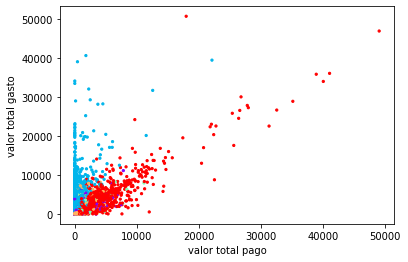

In [67]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

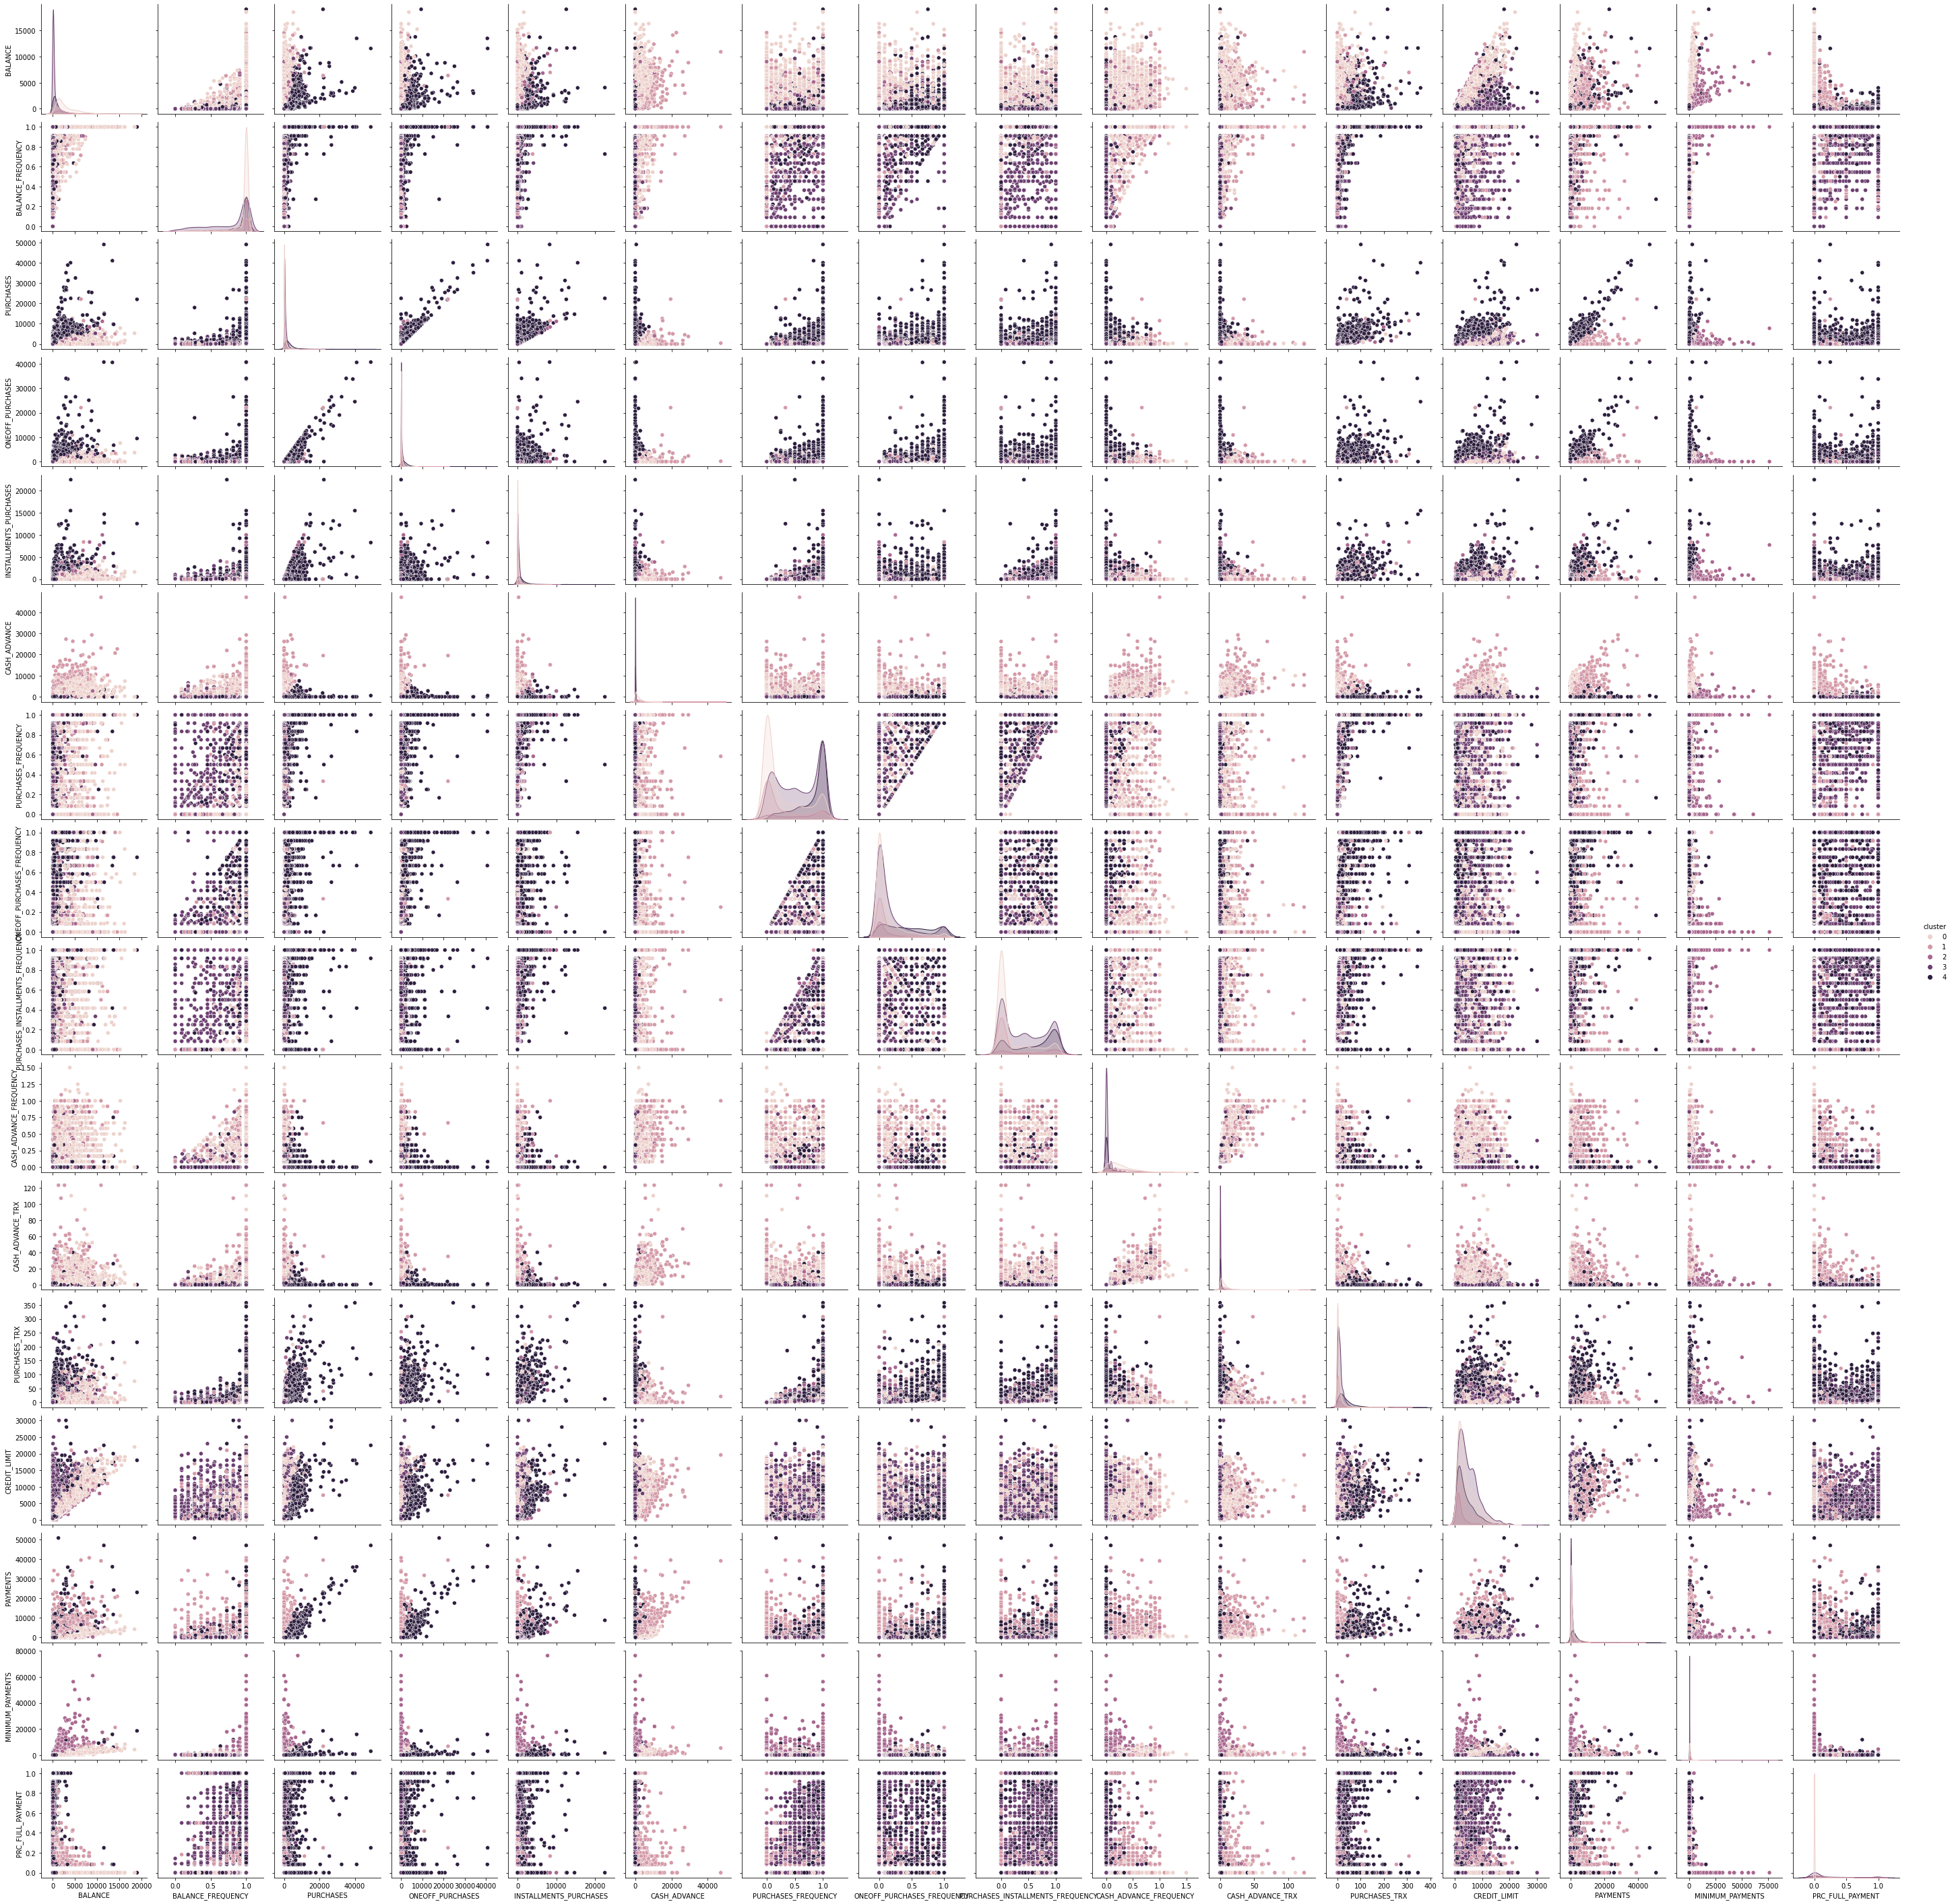

In [68]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

# Aula 08

In [69]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2651.0  3036.509818  2478.358491   6.824905  1257.895616   
1        1071.0  1795.836702  1983.632225   0.000000   506.773698   
2         408.0  1990.318603  1860.968409  70.794108  1016.567882   
3        3281.0   443.767052   846.269966   0.000000    23.390230   
4        1539.0  1144.165942  1664.223404   0.000000   212.743922   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2171.222526  4223.849965  18495.558550            2651.0  0.963809   
1        1088.056301  2317.702916  14581.459140            1071.0  0.861984   
2        1326.681742  2149.639085  11670.179850             408.0  0.989409   
3          82.980060   411.727643   9630.367575            3281.0  0.774457   
4         556.359504  1372.605793  19043.138560            1539.0  0.928301   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.279644   8345.641905           2651.0  0.001798   
1        ...       887.346861  21235.065300           1071.0  0.117296   
2        ...      7184.162991  76406.207520            408.0  0.019460   
3        ...       248.700571   4483.503862           3281.0  0.246761   
4        ...       525.257953  18621.013310           1539.0  0.277969   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023251  0.0  0.0  0.000000  0.000000  0.6  
1        0.186974  0.0  0.0  0.083333  0.142857  1.0  
2        0.091220  0.0  0.0  0.000000  0.000000  1.0  
3        0.346705  0.0  0.0  0.000000  0.444444  1.0  
4        0.366883  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [71]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04526580e-01 2.72332745e-04 6.20171708e-02 3.64414607e-02
  2.55974069e-02 2.52329514e-01 6.75600478e-05 2.58663568e-05
  4.51550497e-05 5.73437494e-05 1.15422756e-03 1.33589087e-03
  7.18989200e-01 1.66362861e-01 1.79601509e-01 5.51886878e-07]
 [2.35481987e-01 2.16532182e-04 6.00600804e-02 3.39871776e-02
  2.60781223e-02 4.00599972e-01 5.26908300e-05 2.04104938e-05
  3.53115349e-05 6.55611402e-05 1.57284062e-03 1.12114713e-03
  5.34945073e-01 5.97780714e-01 1.04603362e-01 2.77383565e-05]
 [3.30293653e-01 2.68533239e-04 1.57028833e-01 3.42695419e-02
  1.23148700e-01 5.87967103e-02 1.66137163e-04 2.53359090e-05
  1.47502343e-04 1.95347549e-05 4.32007163e-04 3.86025028e-03
  3.74390286e-01 2.51594336e-01 6.83611752e-01 4.29215417e-06]
 [6.91301537e-02 2.30765086e-04 1.21502301e-01 4.80067869e-02
  7.35956821e-02 2.45411917e-02 1.72786944e-04 3.36773370e-05
  1.40242797e-04 7.95234417e-06 1.25366124e-04 2.86281946e-03
  9.43495432e-01 1.53853364e-01 5.68593093e-02 7.61128894e-05]
 [1.

In [72]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format (centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


In [77]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        3036.509818   385.376134   1634.262935   4493.115805   968.393476
1        1795.836702   470.954463   3272.160223   3975.416631  4704.149015
2        1990.318603   856.504755    424.225892   2231.985294  1340.280120
3         443.767052   629.212624    141.652025   5129.746043   814.456295
4        1144.165942  3274.047005    185.924210   4102.378266  3045.625330


C:\Users\PV\AppData\Local\Temp/ipykernel_23748/45307257.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [82]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3036.509818   385.376134   1634.262935   4493.115805   968.393476   
1        1795.836702   470.954463   3272.160223   3975.416631  4704.149015   
2        1990.318603   856.504755    424.225892   2231.985294  1340.280120   
3         443.767052   629.212624    141.652025   5129.746043   814.456295   
4        1144.165942  3274.047005    185.924210   4102.378266  3045.625330   

         n_clients  
cluster             
0             2651  
1             1071  
2              408  
3             3281  
4             1539  


C:\Users\PV\AppData\Local\Temp/ipykernel_23748/2296433210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
